#Ablation Study: 1D causal layer into proposed TS-CausalNN Model (Synthetic Dataset 2)


This notebook contains the proposed TS-CausalNN model with 1D custom calsal. We have developed the proposed Causal 1D layer to analyse the effectiveness of our proposed Causal Conv2D layer.
  

In this notebook, we applied the ablation 1D model to the synthetic dataset-2 to generate a full causal graph and summary graph.

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/synthetic_2nd_dataset.csv')

In [ ]:
data.iloc[10:20,:]

,S1,S2,S3,S4,noise1,noise2,noise3,noise4
10,2.061840,3.768749,-3.578629,-1.984800,-0.208564,-0.205634,1.200093,-0.040097
11,2.943617,0.224257,-1.666154,-0.168897,-0.916620,-0.277065,-1.063374,-0.350172
12,-1.071697,-1.048254,-0.768185,4.503882,-1.074743,-1.103423,-0.701851,0.878436
13,-0.086135,-1.703967,-2.552078,0.703897,-0.086143,-0.435562,0.291665,0.164922
14,5.157780,-4.329222,-6.862887,2.685842,1.175839,-0.358790,-1.831586,2.308804
15,2.541166,-1.058048,-0.414619,0.146031,-1.635092,-1.058055,-0.414611,0.061605
16,1.228194,-1.363224,0.459001,6.849125,1.228194,-1.529571,0.659014,1.699562
17,1.180408,1.840824,-1.556459,-0.771875,1.076386,-0.134741,0.818922,-1.875616
18,4.613739,1.828444,-2.783601,3.372302,0.394773,-0.264147,-0.267509,1.433904
19,-0.387701,1.226694,-0.628026,-1.913976,-0.387701,1.226594,-0.627906,-1.973290


In [ ]:
true_graph = np.zeros((4,4))
true_graph[0,0]=1
true_graph[0,1]=1
true_graph[0,2]=1
true_graph[0,3]=1
true_graph[2,3]=1
true_graph[3,3]=1
true_graph

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
true_full_graph = np.zeros((4,24))
true_full_graph[0,0]=1
true_full_graph[0,12]=1
true_full_graph[1,16]=1
true_full_graph[2,16]=1
true_full_graph[3,16]=1
true_full_graph[3,18]=1
true_full_graph[3,19]=1
true_full_graph


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 0.]])

In [ ]:
!pip install cdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=5f03602cb188e87722440db852288cd6adf23deaee02b5018a989a2c5eef226f
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=707b8c8e329c8c883ce8df1684c991c268b6ca50871557869107b7721e2ac647
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


#Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd

def data_preprocessing(data, max_lag=5):
  from sklearn.preprocessing import MinMaxScaler

  #convert to numpy array
  syn_data_np = data.to_numpy()

  #normalize the dataset
  scaler_X = MinMaxScaler(feature_range=(0, 1))
  syn_data_np_nor = scaler_X.fit_transform(syn_data_np)
  syn_data_np = syn_data_np_nor

  #transform into 2D data
  syn_data_np_T= syn_data_np.T
  syn_data_pro = np.zeros((syn_data_np.shape[0]-max_lag,syn_data_np.shape[1],(max_lag+1)))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    syn_data_pro[i,:,:]= syn_data_np_T[:, i:i+(max_lag+1)]
  syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)

  #make datafrom with normalized data
  syn_data_nor_df =pd.DataFrame(data = syn_data_np,
                  columns = data.columns)

  #transform normalized data into 1D shape with lagged and current time values
  size_1d = syn_data_np.shape[1]*(max_lag+1)
  print(size_1d)
  syn_data_1d = np.zeros((syn_data_np.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np.shape[1]
      syn_data_1d[i,j_end:j_end+syn_data_np.shape[1]]= syn_data_np[i+j, :]

  #transform non-normalized data into 1D shape with lagged and current time values
  syn_data_np_2 = data.to_numpy()
  syn_data_1d_not_norm = np.zeros((syn_data_np_2.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np_2.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np_2.shape[1]
      syn_data_1d_not_norm[i,j_end:j_end+syn_data_np_2.shape[1]]= syn_data_np_2[i+j, :]


  return syn_data_np_nor, syn_data_2d, syn_data_nor_df, syn_data_1d,  syn_data_1d_not_norm

In [ ]:
syn_data_np, syn_data_2d, syn_data_nor_df, syn_data_1d, syn_data_1d_not_norm = data_preprocessing(data.iloc[:,:4], max_lag=5)

24


In [ ]:
syn_data_2d.shape

(99995, 4, 6, 1)

In [ ]:
syn_data_np.shape

(100000, 4)

In [ ]:
syn_data_nor_df.shape

(100000, 4)

In [ ]:
syn_data_1d.shape

(99995, 24)

In [ ]:
syn_data_1d_not_norm.shape

(99995, 24)

In [ ]:
syn_data_np.shape, syn_data_2d.shape

((100000, 4), (99995, 4, 6, 1))

In [ ]:
data_y_syn = syn_data_np[5:,0:4]
data_y_syn.shape

(99995, 4)

# Ablation TS-CausalNN Model with 1D Causal Layer

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AveragePooling2D, LSTM, Activation, ConvLSTM2D, TimeDistributed, Input, Reshape
from keras.layers import UpSampling1D, Conv2DTranspose, UpSampling2D, Conv1D, AveragePooling1D, LeakyReLU
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
import keras.backend as K
import tensorflow as tf
from keras.layers import concatenate
from keras.regularizers import l1, l2
from time import time

keras.utils.set_random_seed(1001)

In [ ]:
class CausalDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs, counter, **kwargs):
    super(CausalDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    self.counter = counter
    #self.name1=name1

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]), self.num_outputs],
                                  #initializer = keras.initializers.RandomUniform(minval=0.05, maxval=0.5),
                                  initializer = tf.keras.initializers.glorot_uniform(seed=17),
                                  trainable=True)
    self.mask = np.ones(shape=self.kernel.shape)
    self.mask[-self.counter, ...] = 0.0
    #self.kernel(self.kernel * self.mask)

  def get_weights(self):
     return super().get_weights()

  def call(self, inputs):
    self.kernel.assign(self.kernel * self.mask)
    #return tf.matmul(inputs, self.kernel)
    return tf.keras.activations.sigmoid(tf.matmul(inputs, self.kernel))


In [ ]:
def get_model(input_dims):
    input_batch = Input(shape = input_dims)

    conv_model = Sequential()
    conv_model = Conv2D(filters=4, kernel_size=1, strides=(1,1), padding='valid', activation="tanh", name='conv1')(input_batch)
    conv_model = tf.math.reduce_mean(conv_model, axis=-1)
    conv_model = Flatten()(conv_model )
    pooled_outputs = []
    for i in range(4, 0, -1):
      layer = CausalDenseLayer(num_outputs=1, counter=i, name="parr"+str(i))(conv_model)
      pooled_outputs.append(layer)
    output = concatenate(pooled_outputs)

    model = Model(inputs=input_batch, outputs=output, name='cpred')

    return model

In [ ]:
class CausalNNModel(object):
    def __init__(self,
                 dims,
                 alpha=0.0,
                 rho = 1.0,
                 rho_max = 10e20,
                 h_tol = 1e-8,
                 init='glorot_uniform'):

        super(CausalNNModel, self).__init__()

        self.dims = dims
        self.n_stacks = len(self.dims) - 1
        self.alpha = alpha
        self.rho = rho
        self.h_p = np.Inf
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_1d = get_model(self.dims) #get_model_2d(self.dims)
        print("====Model created=====")

        self.model = Model(inputs=self.model_1d.input, outputs=self.model_1d.output)


    def custom_loss_function(self, y_true, y_pred):
      mse = keras.losses.mean_squared_error(y_true, y_pred)
      h_val = self.causal_loss_h()
      h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
      lambda1 = 0.1
      adj_mat = self.get_mat()
      sparse_loss = lambda1 * tf.math.reduce_sum(tf.abs(adj_mat))
      print('MSE Loss is: {}, h Loss is: {}, L1 loss: {}, Total Loss is: {}'.format(tf.reduce_mean(mse), h_loss, sparse_loss, tf.reduce_mean(mse)+h_loss))
      return mse + h_loss + sparse_loss

    def causal_loss_h(self):
      mat = self.get_mat()
      h_val = self.h_acy_1(mat[:, 20:])
      return h_val

    def get_mat(self):
      w1_2d_s = self.model.get_layer(index=-5).get_weights()
      w2_2d_s = self.model.get_layer(index=-4).get_weights()
      w3_2d_s = self.model.get_layer(index=-3).get_weights()
      w4_2d_s = self.model.get_layer(index=-2).get_weights()
      arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0)).flatten('F'), axis=0)
      arr2_2d_s = np.expand_dims(np.squeeze(np.array(w2_2d_s), axis=(0)).flatten('F'), axis=0)
      arr3_2d_s = np.expand_dims(np.squeeze(np.array(w3_2d_s), axis=(0)).flatten('F'), axis=0)
      arr4_2d_s = np.expand_dims(np.squeeze(np.array(w4_2d_s), axis=(0)).flatten('F'), axis=0)
      mat_2d_s = np.concatenate((arr1_2d_s, arr2_2d_s, arr3_2d_s, arr4_2d_s))
      #print(mat_2d_s.shape)
      return mat_2d_s

    def h_acy_1(self, A):
      n_var = A.shape[0]
      h = tf.linalg.trace(tf.linalg.expm(A * A)) - n_var
      return h


    def h_acy(self, A):
      '''Calculate the constraint of A ensure that it's a DAG'''
      n_var = A.shape[0]
      M = tf.eye(n_var, num_columns = n_var) + A/n_var
      E = M
      for _ in range(n_var - 2):
        E = tf.linalg.matmul(E, M)
      h = tf.math.reduce_sum(tf.transpose(E) * M) - n_var
      return h

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss= self.custom_loss_function) # ['mse', self.causal_loss()])

    def fit(self, x, y=None, maxiter=100, batch_size=512, save_dir='./results/temp'):
        t1 = time()

        import csv
        logfile = open(save_dir + '/causalnn_log.csv', 'w')
        logwriter = csv.DictWriter(logfile, fieldnames=['iter','loss'])
        logwriter.writeheader()
        train_loader = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)
        optimizer = tf.keras.optimizers.Adam(1e-2)
        w1_2d_s = self.model.get_layer(index=-5).get_weights()
        arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0)).flatten('F'), axis=0)


        for epoch in range(int(maxiter)):
          print('Epoch: {}', epoch)
          h_n = None
          for (x, y) in train_loader:
            #eval loss and compute gradients
            with tf.GradientTape() as tape:
              tape.watch(self.model.trainable_variables)
              #passing through neural network
              output = self.model(x)
              #calculate loss
              loss = self.custom_loss_function(y, output)
              gradients = tape.gradient(loss, self.model.trainable_variables)
              optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
              h_n = self.causal_loss_h()

          if h_n > 0.25 * self.h_p:
                self.rho = self.rho*1.1
          self.h_p = h_n
          print('New h_val is :', h_n)
          self.alpha += self.rho * self.h_p

          if self.h_p <= self.h_tol or self.rho >= self.rho_max:
            print('Before the loop end # h_val is: {}, rho is: {}'.format(self.h_p, self.rho))
            break

        # save the trained model
        logfile.close()
        file_name  = "/CausalNN_model_final_" + str(round(time()))+ ".h5"
        print('saving model to:', save_dir + file_name)
        self.model.save_weights(save_dir + file_name)

        w1_2d_s_1 = self.model.get_layer(index=-5).get_weights()
        arr1_2d_s_1 = np.expand_dims(np.squeeze(np.array(w1_2d_s_1), axis=(0)).flatten('F'), axis=0)

        y_pred = self.model.predict(x)
        adj_mat = self.get_mat()

        print('The conv layer 1 weights before training :', arr1_2d_s)
        print('The conv layer 1 weights after training :', arr1_2d_s_1)

        return y_pred, adj_mat

#Model creation and training:

In [ ]:
keras.utils.set_random_seed(101)

cnnmodel = CausalNNModel(dims=syn_data_2d.shape[1:])

====Model created=====


In [ ]:
cnnmodel.model.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_26 (InputLayer)       [(None, 4, 6, 1)]            0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 4, 6, 4)              8         ['input_26[0][0]']            
                                                                                                  
 tf.math.reduce_mean_25 (TF  (None, 4, 6)                 0         ['conv1[0][0]']               
 OpLambda)                                                                                        
                                                                                                  
 flatten_25 (Flatten)        (None, 24)                   0         ['tf.math.reduce_mean_2

In [ ]:
cnnmodel.compile()

In [ ]:
y_pred, mat = cnnmodel.fit(x=syn_data_2d, y=data_y_syn, maxiter=100, batch_size=2048, save_dir='/content/')

Streaming output truncated to the last 5000 lines.
MSE Loss is: 0.010089157149195671, h Loss is: 0.26111897826194763, L1 loss: 2.9643566608428955, Total Loss is: 0.27120813727378845
MSE Loss is: 0.009585774503648281, h Loss is: 0.27297669649124146, L1 loss: 2.9485950469970703, Total Loss is: 0.2825624644756317
MSE Loss is: 0.009521330706775188, h Loss is: 0.28443431854248047, L1 loss: 2.9326701164245605, Total Loss is: 0.29395565390586853
MSE Loss is: 0.00949995219707489, h Loss is: 0.2963254451751709, L1 loss: 2.9169106483459473, Total Loss is: 0.305825412273407
MSE Loss is: 0.009082170203328133, h Loss is: 0.30876827239990234, L1 loss: 2.900284767150879, Total Loss is: 0.3178504407405853
MSE Loss is: 0.008914873003959656, h Loss is: 0.32136330008506775, L1 loss: 2.8837082386016846, Total Loss is: 0.3302781581878662
MSE Loss is: 0.008898040279746056, h Loss is: 0.3349531888961792, L1 loss: 2.8665874004364014, Total Loss is: 0.343851238489151
MSE Loss is: 0.009036361239850521, h Loss i

Convert the predicted adjacency for visualization as a table.

In [ ]:
mat_df_2d_s = pd.DataFrame(mat)

In [ ]:
mat_f_df = pd.DataFrame(mat).T

In [ ]:
mat_df_2d_s.T

,0,1,2,3
0,0.071359,0.052109,0.046734,-0.153168
1,0.070997,0.066641,0.058173,-0.117907
2,0.076428,0.071130,0.057025,-0.154847
3,0.070732,0.073338,0.068572,-0.334314
4,0.074411,0.083998,0.112258,-0.423184
5,-2.691404,0.076630,0.064999,-0.140411
6,0.008105,0.004729,0.003626,-0.020956
7,-0.006176,-0.002024,0.000881,-0.018607
8,-0.004823,-0.000379,-0.002633,-0.012737
9,-0.003293,-0.000060,-0.001322,0.022813


#Full Causal Graph

In [ ]:
matrix_2d_2d_s = mat

In [ ]:
np.savetxt('/content/ablation-1d-full-adj-mat-D2.csv', matrix_2d_2d_s, delimiter=",")

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)"]
pred_graph_f = np.zeros((4,24))

In [ ]:
for i in range (0, 24):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/4)+1,(i%4)+1))

In [ ]:
for i in range(0, 24):
  for j in range (0, 4):
    if matrix_2d_2d_s[j,i] > 0.08:
      print(i,j)
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)
      pred_graph_f[j,i]=1


4 1
4 2
14 3
15 3
18 0
18 1
19 1
19 2
20 2
22 0
22 3


In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
pos_2d_s

{'S1(t-5)': (1, 1),
 'S2(t-5)': (1, 2),
 'S3(t-5)': (1, 3),
 'S4(t-5)': (1, 4),
 'S1(t-4)': (2, 1),
 'S2(t-4)': (2, 2),
 'S3(t-4)': (2, 3),
 'S4(t-4)': (2, 4),
 'S1(t-3)': (3, 1),
 'S2(t-3)': (3, 2),
 'S3(t-3)': (3, 3),
 'S4(t-3)': (3, 4),
 'S1(t-2)': (4, 1),
 'S2(t-2)': (4, 2),
 'S3(t-2)': (4, 3),
 'S4(t-2)': (4, 4),
 'S1(t-1)': (5, 1),
 'S2(t-1)': (5, 2),
 'S3(t-1)': (5, 3),
 'S4(t-1)': (5, 4),
 'S1(t)': (6, 1),
 'S2(t)': (6, 2),
 'S3(t)': (6, 3),
 'S4(t)': (6, 4)}

In [ ]:
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

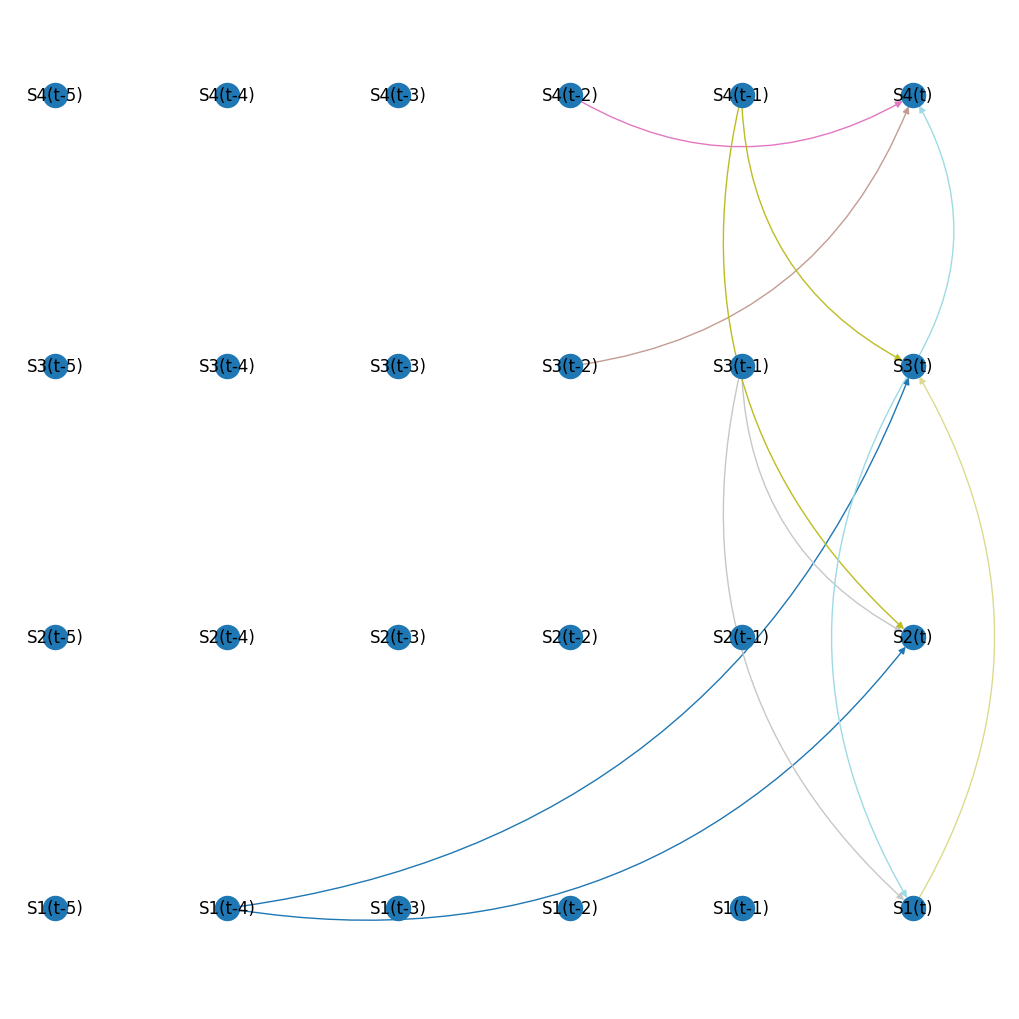

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_f)

18.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_f

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.8958333333333334, Precision: 0.0, Recall: 0.0, FDR: 1.0, F1 Score: nan


invalid value encountered in double_scalars


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_full_graph.reshape(-1), pred_graph_f.reshape(-1), normalize=True)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_full_graph.reshape(-1), pred_graph_f.reshape(-1))
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(true_full_graph.reshape(-1), pred_graph_f.reshape(-1))
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(true_full_graph.reshape(-1), pred_graph_f.reshape(-1))
print("F1-Score:", f1)

Accuracy: 0.9270833333333334
Precision: 0.5
Recall (Sensitivity): 0.42857142857142855
F1-Score: 0.4615384615384615


##Summary Causal Graph

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

nodes_2d_s1 = ["S1", "S2", "S3",  "S4"]
nodes_r_2d_s1= ["S1", "S2", "S3",  "S4"]
edges_2d_s1 = []
pred_graph_s1 = np.zeros((4,4))

In [ ]:
for i in range (0, 4):
  G_2d_s1.add_node(nodes_2d_s1[i],pos=(int(i/2)+1,(i%2)+1))

In [ ]:
for i in range(0, 24):
  for j in range (0, 4):
    if matrix_2d_2d_s[j,i] > 0.1:
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s1[i%4], nodes_r_2d_s1[j], weight=i)
      pred_graph_s1[i%4, j]=1


4 2 0.12156385
14 3 0.10447864
15 3 0.109445594
19 1 0.11465547
19 2 0.106177054
22 3 0.9073286


In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'S1': (1, 1), 'S2': (1, 2), 'S3': (2, 1), 'S4': (2, 2)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


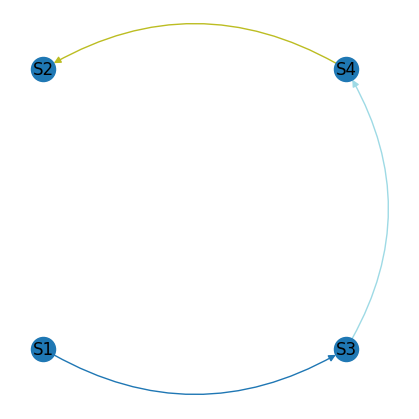

In [ ]:
import matplotlib.pyplot as plt #####

plt.figure(figsize=(4, 4))
nx.draw(G_2d_s1, pos_2d_s1, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
pred_graph_s1

array([[1., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
true_graph

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
np.savetxt('/content/proposed-summary-adj-mat-D2-f.csv', pred_graph_s1, delimiter=",")

In [ ]:
cdt.metrics.SHD(true_graph, pred_graph_s1)

5.0

In [ ]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.6875, Precision: 0.6666666666666666, Recall: 0.3333333333333333, FDR: 0.3333333333333333, F1 Score: 0.4444444444444444


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1), normalize=True)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("F1-Score:", f1)

Accuracy: 0.6875
Precision: 0.6666666666666666
Recall (Sensitivity): 0.3333333333333333
F1-Score: 0.4444444444444444
